Dataset link: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing CSV file

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### Shape of dataframe

In [3]:
df.shape

(991346, 24)

### Checking for duplicate values

In [4]:
df.duplicated().sum()

26

### Dropping duplicate values

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(991320, 24)

### Checking for null values

In [7]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991320 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991320 non-null  object 
 1   age               991320 non-null  int64  
 2   height            991320 non-null  int64  
 3   weight            991320 non-null  int64  
 4   waistline         991320 non-null  float64
 5   sight_left        991320 non-null  float64
 6   sight_right       991320 non-null  float64
 7   hear_left         991320 non-null  float64
 8   hear_right        991320 non-null  float64
 9   SBP               991320 non-null  float64
 10  DBP               991320 non-null  float64
 11  BLDS              991320 non-null  float64
 12  tot_chole         991320 non-null  float64
 13  HDL_chole         991320 non-null  float64
 14  LDL_chole         991320 non-null  float64
 15  triglyceride      991320 non-null  float64
 16  hemoglobin        991320 

### Replacing 'Female' with 1 and 'Male' with 0 in sex column

In [9]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df['sex'] = df['sex'].map({'Female':1,'Male':0})

In [11]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


### Replacing 'Y' with 1 and 'N' with 0 in DRK_YN column

In [12]:
df['DRK_YN'] = df['DRK_YN'].map({"Y":1,"N":0})

In [47]:
import warnings
warnings.filterwarnings("ignore")

### Correlation between Variables

In [13]:
corr = df.corr()

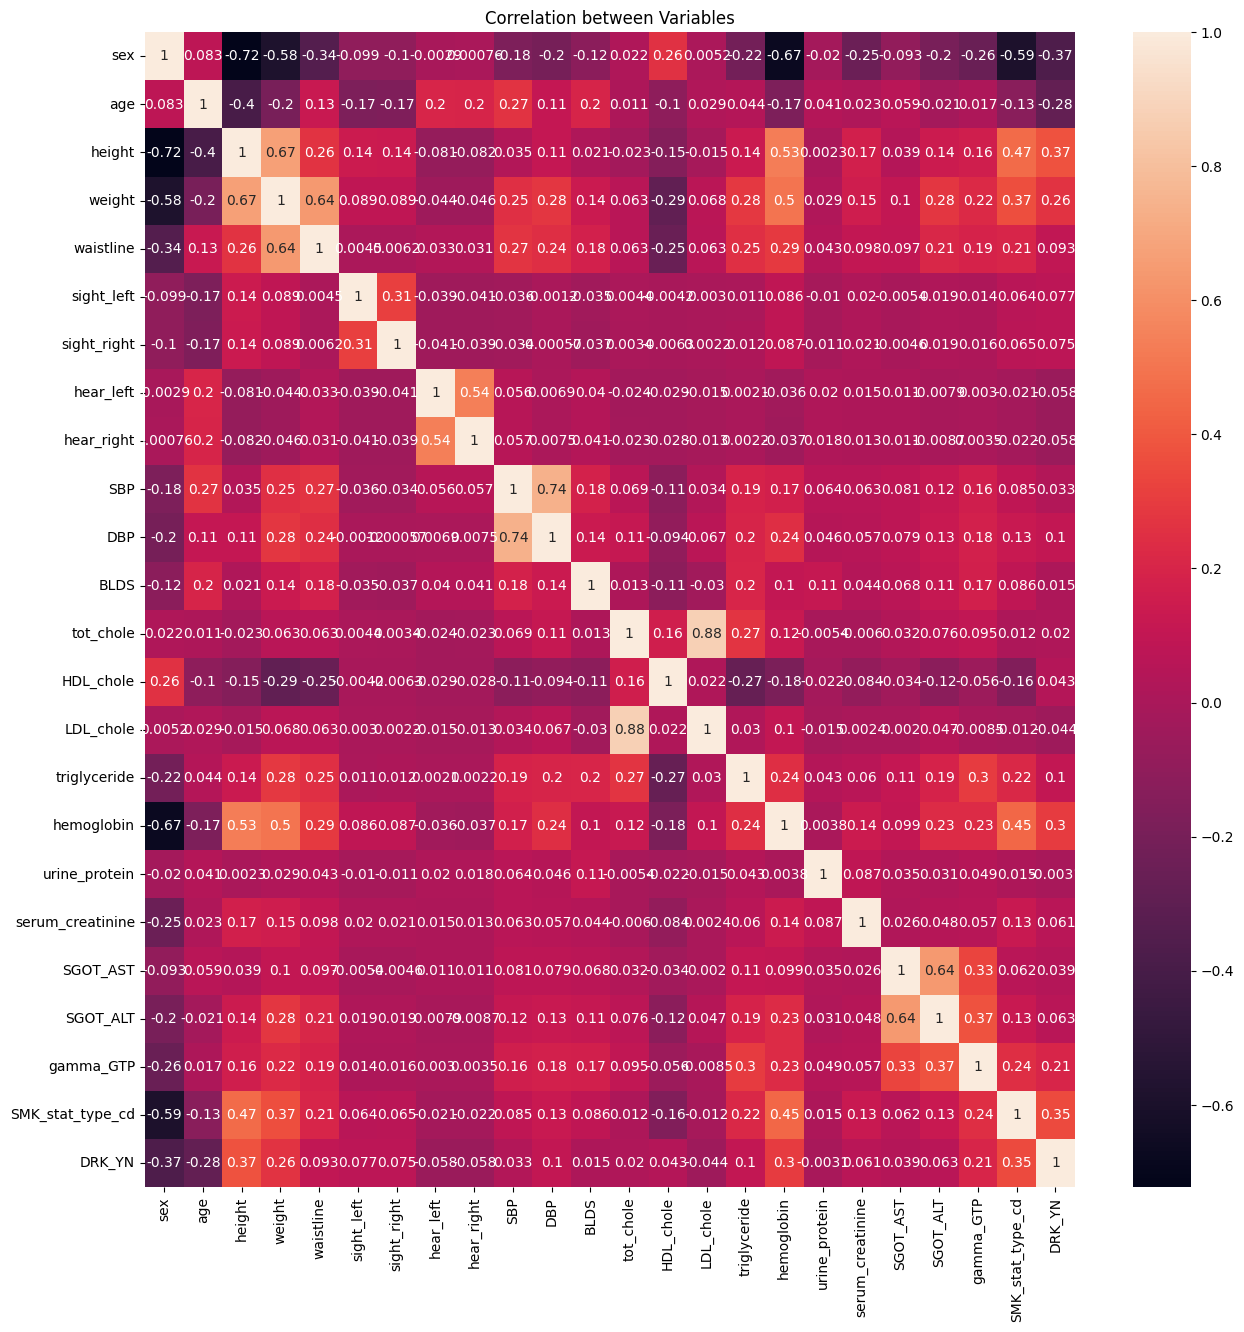

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.title("Correlation between Variables")
plt.show()

In [15]:
corr_y = corr['DRK_YN'].abs().sort_values(ascending=False)

### Independent Variables

In [16]:
X = df.drop('DRK_YN',axis=1)
X.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0


### Dependent Variables

In [17]:
y = df['DRK_YN']
y[:5]

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

### Checking is our dataset is imbalanced or not

In [18]:
y.value_counts()

DRK_YN
0    495844
1    495476
Name: count, dtype: int64

Our dataset is balanced.

### Splitting data into Training and testing test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

### Normalization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the model

### Using SVC algorithm

In [21]:
# from sklearn.svm import SVC

# svc = SVC()
# svc.fit(X_train_scaled,y_train)

In [22]:
# svc.score(X_test_scaled,y_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# y_pred = svc.predict(X_test_scaled)
# cm = confusion_matrix(y_test, y_pred)
# cm

In [25]:
# print(classification_report(y_test,y_pred))

### Using Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV()
log_reg.fit(X_train_scaled,y_train)

LogisticRegressionCV()

In [35]:
log_reg.score(X_test_scaled, y_test)

0.7259209942299156

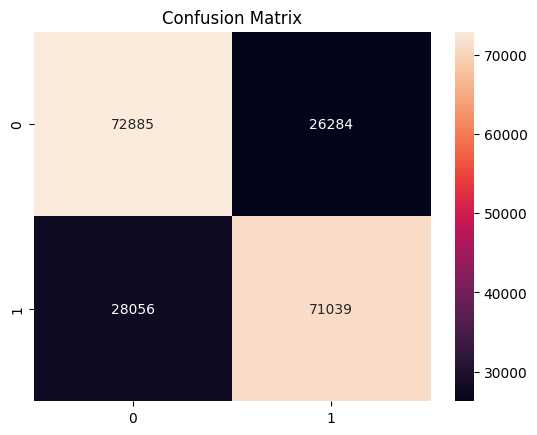

In [36]:
y_pred = log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='.0f')
plt.title("Confusion Matrix")
plt.show()

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73     99169
           1       0.73      0.72      0.72     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



### Using Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50,criterion="gini")
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.730011499818424

In [39]:
y_pred = forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     99169
           1       0.73      0.72      0.73     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



### Using Gradient Boosting Algorithm

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier()
grad.fit(X_train_scaled,y_train)
grad.score(X_test_scaled,y_test)

0.735302425049429

In [45]:
y_pred = grad.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     99169
           1       0.73      0.75      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


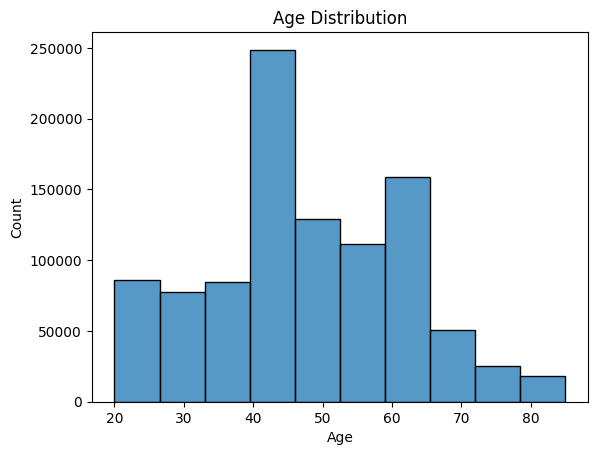

In [40]:
sns.histplot(data=df,x='age',bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

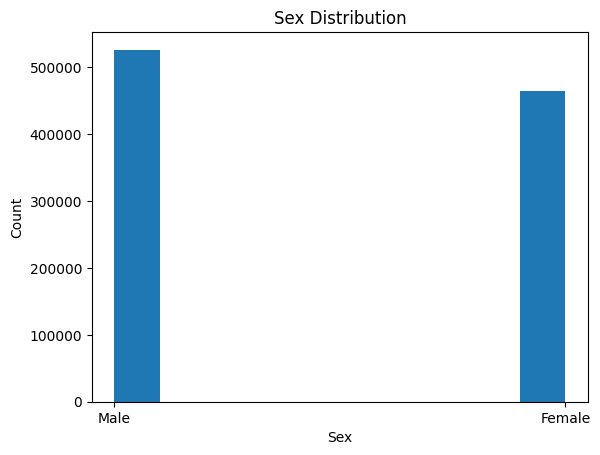

In [43]:
plt.hist(df['sex'],bins=10)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks([0,1], labels=['Male','Female'])
plt.show()

c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

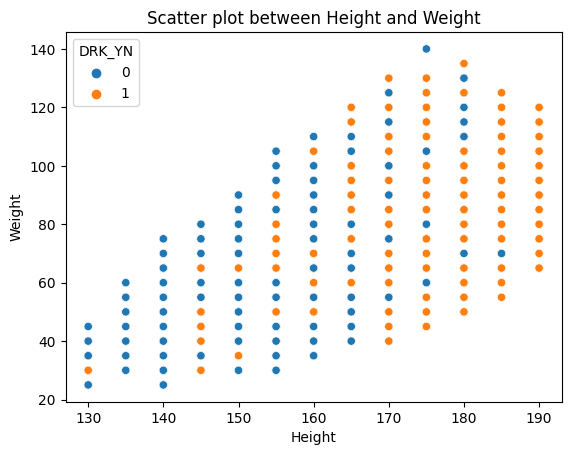

In [46]:
sns.scatterplot(data=df, x='height',y='weight',hue='DRK_YN')
plt.title("Scatter plot between Height and Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

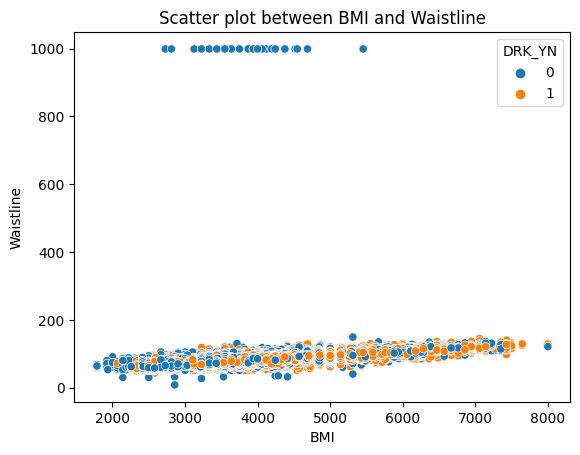

In [48]:
df['BMI'] = (df['weight']*10000)/df['height']
sns.scatterplot(data=df, x='BMI',y='waistline',hue='DRK_YN')
plt.title("Scatter plot between BMI and Waistline")
plt.xlabel("BMI")
plt.ylabel("Waistline")
plt.show()